In [3]:
# A quick look of data shows linear modeling won't be accurate.
# becuse of the postion patterns and outliers. So 
# Dennis Added Non-Linear Modeling and Predicition Accuracy
# after data cleaning/propressing including removal of outliers)


In [5]:
# Import required dependencies
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [10]:
# Import data from download Kaggle: https://www.kaggle.com/datasets/the-guardian/olympic-games?select=summer.csv
file_path = r'C:\Users\des9231\Desktop\boot_camp_assignment\M16_17_Project2\Summer-Olympics-2024-Predictive-Model\resource\summer_1.csv'
df = pd.read_csv(file_path)
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [12]:
# Get info on all features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [20]:
#drop unnecessary columns   


In [22]:
#get medal count by country, sport, gender and medal groupings
medal_type_ct_country = df.groupby(['Year','Country','Medal']).agg(Medal_count=('Medal','count')).sort_values('Medal_count', ascending=False).reset_index()
medal_type_ct_country.head(20)

,Year,Country,Medal,Medal_count
0,1980,URS,Gold,192
1,1984,USA,Gold,168
2,1996,USA,Gold,160
3,2012,USA,Gold,147
4,1904,USA,Gold,146
5,1908,GBR,Gold,144
6,1904,USA,Silver,137
7,1908,GBR,Silver,135
8,1988,URS,Gold,134
9,2000,USA,Gold,130


In [24]:
usa_df = medal_type_ct_country.loc[medal_type_ct_country['Country']=='USA'].sort_values(by=['Year'])
usa_df.set_index('Year',inplace=True)
usa_df.head()

,Country,Medal,Medal_count
Year,,,
1896,USA,Bronze,2
1896,USA,Silver,7
1896,USA,Gold,11
1900,USA,Silver,14
1900,USA,Bronze,14


In [26]:
#get medal count by country, sport, gender and medal groupings
medal_ct_country = df.groupby(['Year','Country']).agg(Medal_count=('Medal','count')).sort_values('Medal_count', ascending=False).reset_index()
medal_ct_country.head()

,Year,Country,Medal_count
0,1980,URS,442
1,1904,USA,394
2,1908,GBR,347
3,1984,USA,333
4,2008,USA,315


In [28]:
#select USA and set year as index
usa_df = medal_ct_country.loc[medal_ct_country['Country']=='USA'].sort_values(by=['Year'])
usa_df.set_index('Year',inplace=True)
usa_df

,Country,Medal_count
Year,,
1896,USA,20
1900,USA,55
1904,USA,394
1908,USA,63
1912,USA,101
1920,USA,193
1924,USA,198
1928,USA,84
1932,USA,181


<Axes: xlabel='Year'>

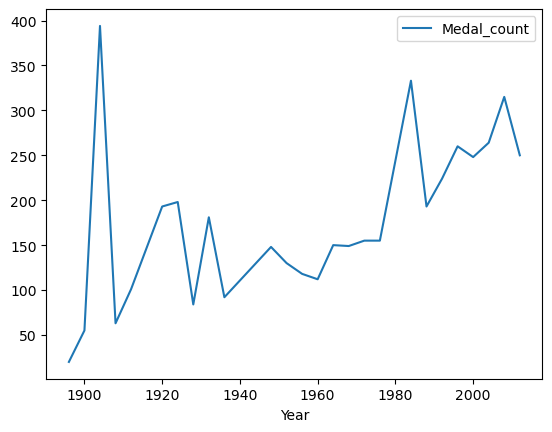

In [30]:
#plot the dataframe
usa_df.plot()

In [34]:
# Shen Code for non-linear modeling

In [36]:
# Import dependencies (libraries, tool packages, functions)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy, scipy, matplotlib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy, scipy, matplotlib

# prepare data for polynomial regression modeling: use usa_df (before prophet)

#calculate total medal amount and select USA 
medal_ct_country = df.groupby(['Year','Country']).agg(Medal_count=('Medal','count')).sort_values('Medal_count', ascending=False).reset_index()
usa_df_poly = medal_ct_country.loc[medal_ct_country['Country']=='USA'].sort_values(by=['Year'])
usa_df_poly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 380 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         26 non-null     int64 
 1   Country      26 non-null     object
 2   Medal_count  26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 832.0+ bytes


In [38]:
usa_df_poly

,Year,Country,Medal_count
380,1896,USA,20
163,1900,USA,55
1,1904,USA,394
140,1908,USA,63
68,1912,USA,101
18,1920,USA,193
17,1924,USA,198
82,1928,USA,84
28,1932,USA,181
77,1936,USA,92


In [40]:
# Cleaning data by dropping outliers row1 [1904, 394] and row3 [1984, 333]
# drop row1 [1904, 394]
usa_df_poly_cln6 = usa_df_poly.drop(usa_df_poly.index[2], axis=0)
usa_df_poly_cln6.reset_index(drop=True, inplace=True)
usa_df_poly_cln6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         25 non-null     int64 
 1   Country      25 non-null     object
 2   Medal_count  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [42]:
usa_df_poly_cln6

,Year,Country,Medal_count
0,1896,USA,20
1,1900,USA,55
2,1908,USA,63
3,1912,USA,101
4,1920,USA,193
5,1924,USA,198
6,1928,USA,84
7,1932,USA,181
8,1936,USA,92
9,1948,USA,148


In [44]:
# drop row17 [1984, 333]
usa_df_poly_cln9 = usa_df_poly_cln6.drop(usa_df_poly_cln6.index[17], axis=0)
usa_df_poly_cln9.reset_index(drop=True, inplace=True)
usa_df_poly_cln9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         24 non-null     int64 
 1   Country      24 non-null     object
 2   Medal_count  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


In [46]:
usa_df_poly_cln9

,Year,Country,Medal_count
0,1896,USA,20
1,1900,USA,55
2,1908,USA,63
3,1912,USA,101
4,1920,USA,193
5,1924,USA,198
6,1928,USA,84
7,1932,USA,181
8,1936,USA,92
9,1948,USA,148


In [48]:
# introduce usa_df_poly_clean for convenience
usa_df_poly_clean = usa_df_poly_cln9
usa_df_poly_clean

,Year,Country,Medal_count
0,1896,USA,20
1,1900,USA,55
2,1908,USA,63
3,1912,USA,101
4,1920,USA,193
5,1924,USA,198
6,1928,USA,84
7,1932,USA,181
8,1936,USA,92
9,1948,USA,148


In [50]:
# Non-linear modelling (poly-nomial)
# create factor and dependent variables
y = usa_df_poly_clean['Medal_count']#.astype(int)
X = usa_df_poly_clean.drop(['Country', 'Medal_count'], axis=1)
X, y

(    Year
 0   1896
 1   1900
 2   1908
 3   1912
 4   1920
 5   1924
 6   1928
 7   1932
 8   1936
 9   1948
 10  1952
 11  1956
 12  1960
 13  1964
 14  1968
 15  1972
 16  1976
 17  1988
 18  1992
 19  1996
 20  2000
 21  2004
 22  2008
 23  2012,
 0      20
 1      55
 2      63
 3     101
 4     193
 5     198
 6      84
 7     181
 8      92
 9     148
 10    130
 11    118
 12    112
 13    150
 14    149
 15    155
 16    155
 17    193
 18    224
 19    260
 20    248
 21    264
 22    315
 23    250
 Name: Medal_count, dtype: int64)

In [52]:
# Create Polynomial Model
poly_reg = PolynomialFeatures(degree = 4)

In [54]:
# Train Polynomial Model by fitting the whole dataset becuase we have only 24 rows
# Note independent variable X will be fitted with the PolynomialFeatures class and converted to a new
# variable X_poly. In this, the variable X is converted to a new matrix X_Poly which consists of all the 
# polynomial combinations of features with degree=4.
X_poly = poly_reg.fit_transform(X)

In [56]:
# Now use this non-linear model to predict y with linear regression method.  
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

In [58]:
# Visualize y_pred and y according to X
y_pred_df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
y_pred_df

,Real Values,Predicted Values
0,20,35.647970
1,55,56.856765
2,63,90.496391
3,101,103.392686
4,193,122.513461
5,198,129.212652
6,84,134.323423
7,181,138.086981
8,92,140.746077
9,148,144.547205


In [60]:
# calculate mse by comparing y_pred to y
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1140.7138372875208


In [62]:
# calculate rmse by comparing y_pred to y
rmse = numpy.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 33.77445539586865


In [64]:
# calculate r2_score by comparing y_pred to y
polynomial_r2_score = r2_score(y, y_pred)
print("Polynomial Regression R-squared Score:", polynomial_r2_score)

Polynomial Regression R-squared Score: 0.7863306594949563


NameError: name 'X_grid' is not defined

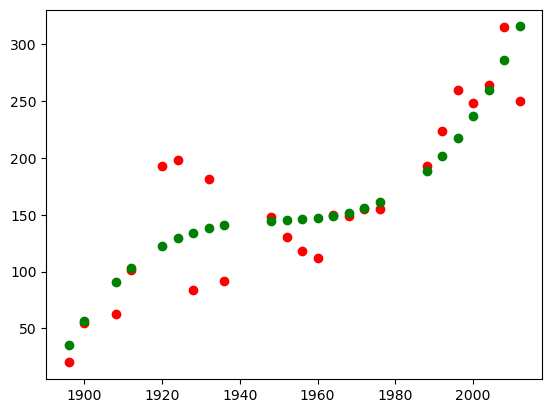

In [66]:
# Visualizing polynomial model using plt
#X_grid = np.arange(min(X), max(X), 0.1)
#X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(pr_model.fit_transform(X_grid)), color = 'black') # Forecast 2024 and after
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Medal_count')
plt.show()